In [1]:
setwd("~/Documents/DE/2018/")
require(ggplot2)

Loading required package: ggplot2


In [17]:
d=read.csv("Polydora_barnacles.csv")

In [18]:
head(d)

Bucket,tagged_oysters,tagged_live_barnacles,tagged_dead_barnacles,tagged_polydora,unused_cv,unused_live_barnacles,unused_dead_barnacles,unused_polydora,X
HM1,15,0,0,1,?,2,5,15,
HM2,9,0,1,2,42,3,1,16,
HM3,11,0,0,1,34,4,0,16,1 ringin?
HM4,14,0,0,0,49,3,0,9,
HM5,15,1,0,8,44,5,0,15,
HM6,8,2,1,3,44,7,0,16,


In [19]:
d$Density=ifelse(substr(d$Bucket,1,1)=="L", "Low", "High")
d$Diversity=ifelse(substr(d$Bucket,2,2)=="P", "Poly", "Mono")

In [21]:
d[,2:9] = apply(d[,2:9], 2, function(x) as.numeric(as.character(x)))

Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”

In [22]:
head(d)

Bucket,tagged_oysters,tagged_live_barnacles,tagged_dead_barnacles,tagged_polydora,unused_cv,unused_live_barnacles,unused_dead_barnacles,unused_polydora,X,Density,Diversity
HM1,15,0,0,1,NA,2,5,15,,High,Mono
HM2,9,0,1,2,42,3,1,16,,High,Mono
HM3,11,0,0,1,34,4,0,16,1 ringin?,High,Mono
HM4,14,0,0,0,49,3,0,9,,High,Mono
HM5,15,1,0,8,44,5,0,15,,High,Mono
HM6,8,2,1,3,44,7,0,16,,High,Mono


In [25]:
d$total_cv=d$tagged_oysters+d$unused_cv
d$total_polydora=d$tagged_polydora+d$unused_polydora
d$percent_polydora=d$total_polydora/d$total_cv

In [41]:
d$total_live=d$tagged_live_barnacles+d$unused_live_barnacles
d$total_dead=d$tagged_dead_barnacles+d$unused_dead_barnacles
d$total_barnacles=d$total_dead+d$total_live
d$percent_barnacles=d$total_barnacles/d$total_cv
d$percent_live=d$total_live/d$total_cv

In [27]:
multi = function(x) {
      c(avg = mean(x, na.rm=TRUE), se = sd(x, na.rm=TRUE)/sqrt(length(x)) )
}

In [29]:
poly=aggregate(percent_polydora~Density+Diversity, data=d, FUN=multi)
poly$avg=poly$percent_polydora[,1]
poly$sd=poly$percent_polydora[,2]
poly=poly[-3]


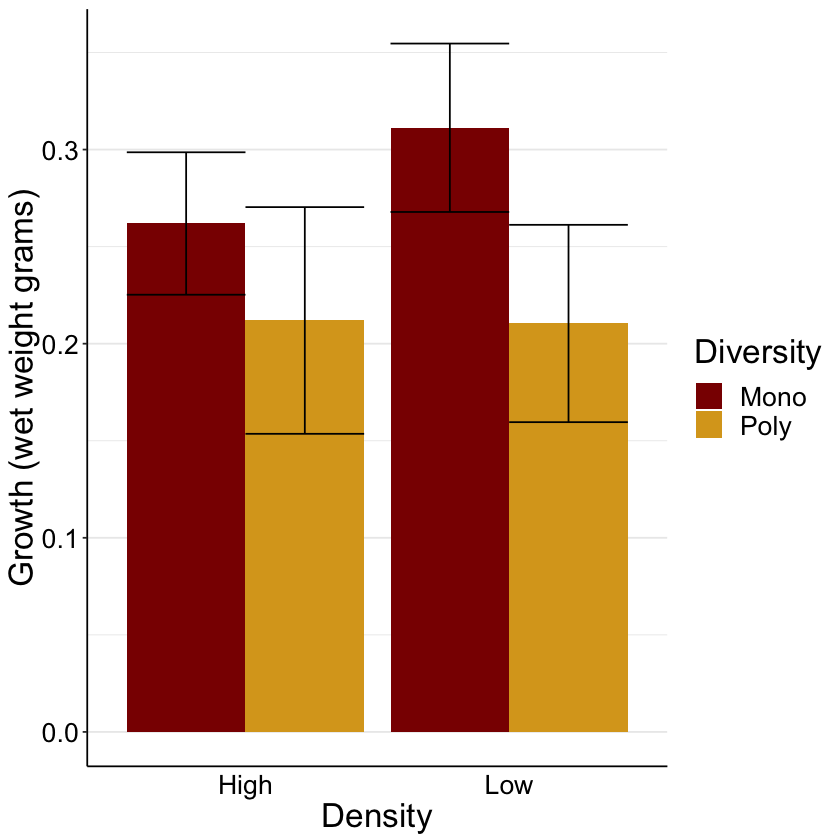

In [33]:
ggplot(poly, aes(x = Density, y = avg, fill=Diversity)) +
scale_fill_manual(values=c("darkred", "goldenrod"))+
        geom_bar(stat="identity", position="dodge")+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") +
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("Growth (wet weight grams)")

In [46]:
require(nlme)

Loading required package: nlme


In [48]:
head(d)

Bucket,tagged_oysters,tagged_live_barnacles,tagged_dead_barnacles,tagged_polydora,unused_cv,unused_live_barnacles,unused_dead_barnacles,unused_polydora,X,Density,Diversity,total_cv,total_polydora,percent_polydora,total_live,total_dead,total_barnacles,percent_barnacles,percent_live
HM1,15,0,0,1,NA,2,5,15,,High,Mono,NA,16,NA,2,5,7,NA,NA
HM2,9,0,1,2,42,3,1,16,,High,Mono,51,18,0.3529412,3,2,5,0.09803922,0.05882353
HM3,11,0,0,1,34,4,0,16,1 ringin?,High,Mono,45,17,0.3777778,4,0,4,0.08888889,0.08888889
HM4,14,0,0,0,49,3,0,9,,High,Mono,63,9,0.1428571,3,0,3,0.04761905,0.04761905
HM5,15,1,0,8,44,5,0,15,,High,Mono,59,23,0.3898305,6,0,6,0.10169492,0.10169492
HM6,8,2,1,3,44,7,0,16,,High,Mono,52,19,0.3653846,9,1,10,0.19230769,0.17307692


In [54]:
poly_results= lm(percent_polydora ~ Density*Diversity , data=d)
summary(poly_results)


Call:
lm(formula = percent_polydora ~ Density * Diversity, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21196 -0.07335 -0.01196  0.07668  0.32806 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.26191    0.04371   5.992 2.16e-06 ***
DensityLow                0.04932    0.06608   0.746    0.462    
DiversityPoly            -0.04995    0.06911  -0.723    0.476    
DensityLow:DiversityPoly -0.05088    0.09562  -0.532    0.599    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1311 on 27 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.09765,	Adjusted R-squared:  -0.002607 
F-statistic: 0.974 on 3 and 27 DF,  p-value: 0.4195


In [39]:
barnacles=aggregate(percent_barnacles~Density+Diversity, data=d, FUN=multi)
barnacles$avg=barnacles$percent_barnacles[,1]
barnacles$sd=barnacles$percent_barnacles[,2]
barnacles=barnacles[-3]


In [42]:
live=aggregate(percent_live~Density+Diversity, data=d, FUN=multi)
live$avg=live$percent_live[,1]
live$sd=live$percent_live[,2]
live=live[-3]


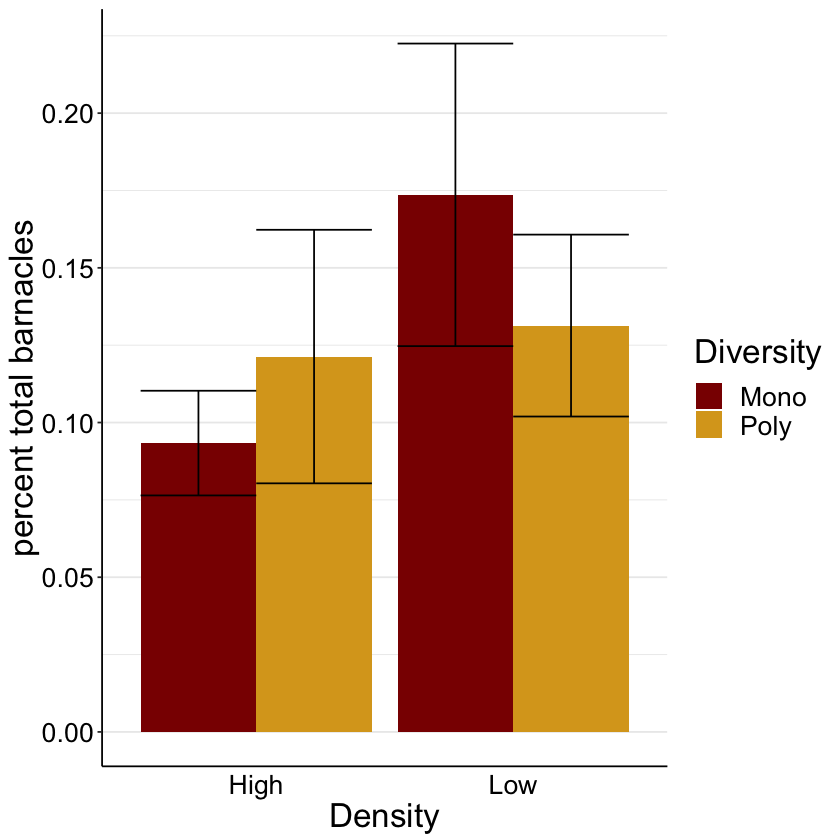

In [43]:
ggplot(barnacles, aes(x = Density, y = avg, fill=Diversity)) +
scale_fill_manual(values=c("darkred", "goldenrod"))+
        geom_bar(stat="identity", position="dodge")+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") +
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("percent total barnacles")

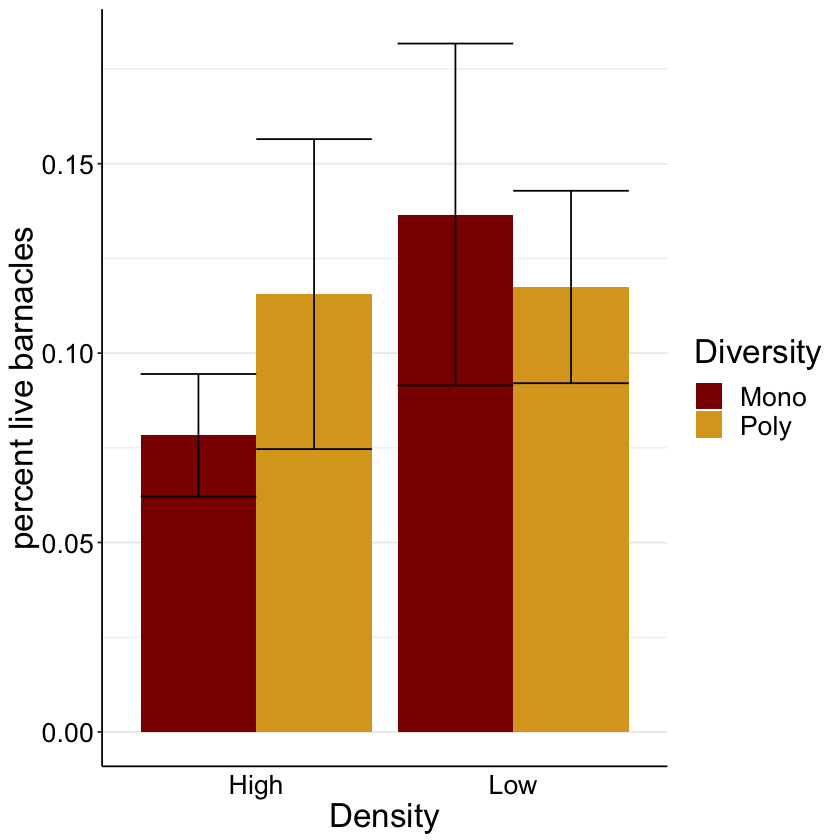

In [44]:
ggplot(live, aes(x = Density, y = avg, fill=Diversity)) +
scale_fill_manual(values=c("darkred", "goldenrod"))+
        geom_bar(stat="identity", position="dodge")+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") +
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("percent live barnacles")